In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('/Users/seoihwan/Desktop/escuela/과기대/nyamnaym-jjeobjjeob/data/combined_data.csv',index_col=0)
df

,year,age,HE_LDL_st2,HE_HDL_st2,HE_insulin,HE_glu,HE_BMI,HE_wt,HE_wc,HE_chol,HE_TG,LDL_HDL_ratio,HOMA_IR,HE_DM_HbA1c
1,2007,50,131.532,58.268,4.9,83,20.852773,51.4,75.8,203,66,2.257363,1.004198,1
2,2007,21,108.412,45.188,10.6,84,19.265440,50.0,58.0,175,107,2.399133,2.198519,1
3,2007,35,122.764,31.236,11.9,97,27.253123,73.3,89.3,184,150,3.930209,2.850123,1
4,2007,76,72.564,31.236,10.3,85,23.773032,56.6,83.0,128,121,2.323089,2.161728,1
5,2007,80,160.548,33.852,14.1,90,26.748114,57.8,89.7,229,173,4.742644,3.133333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39348,2021,44,115.400,35.000,9.0,99,24.000000,60.0,76.0,184,168,3.297143,2.200000,1
39349,2021,54,150.200,33.000,5.0,86,23.000000,55.0,81.0,199,79,4.551515,1.061728,2
39350,2021,25,141.400,63.000,6.0,81,28.000000,87.0,91.0,214,48,2.244444,1.200000,1
39351,2021,45,132.200,37.000,21.0,115,34.000000,105.0,111.0,229,299,3.572973,5.962963,2


In [96]:
df.duplicated().sum()

5359

In [97]:
df[df.year==2020].shape

(10718, 14)

In [98]:
## 2020년도 50% 중복값 확인&제거
df[df.duplicated()]

,year,age,HE_LDL_st2,HE_HDL_st2,HE_insulin,HE_glu,HE_BMI,HE_wt,HE_wc,HE_chol,HE_TG,LDL_HDL_ratio,HOMA_IR,HE_DM_HbA1c
28883,2020,39,91.4,44.0,5.0,84,24.0,78.0,86.0,150,73,2.077273,1.037037,1
28884,2020,39,109.0,65.0,4.0,89,18.0,53.0,68.0,187,65,1.676923,0.879012,1
28885,2020,58,107.8,66.0,15.0,109,27.0,64.0,82.0,208,171,1.633333,4.037037,2
28886,2020,56,174.2,57.0,4.0,107,24.0,68.0,86.0,241,49,3.056140,1.056790,2
28887,2020,53,175.0,78.0,3.0,90,20.0,48.0,71.0,270,85,2.243590,0.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34237,2020,61,121.8,48.0,8.0,98,24.0,58.0,84.0,197,136,2.537500,1.935802,2
34238,2020,51,126.4,51.0,7.0,95,25.0,52.0,74.0,192,73,2.478431,1.641975,1
34239,2020,24,63.2,71.0,14.0,98,26.0,58.0,76.0,153,94,0.890141,3.387654,1
34240,2020,65,66.6,50.0,19.0,119,26.0,76.0,92.0,135,92,1.332000,5.582716,2


In [99]:
df = df.drop_duplicates().reset_index(drop=True)
df.to_csv('combined_date_drop.csv',index=False)

## Explatory Data Anaylisis

<AxesSubplot: xlabel='year', ylabel='HOMA_IR'>

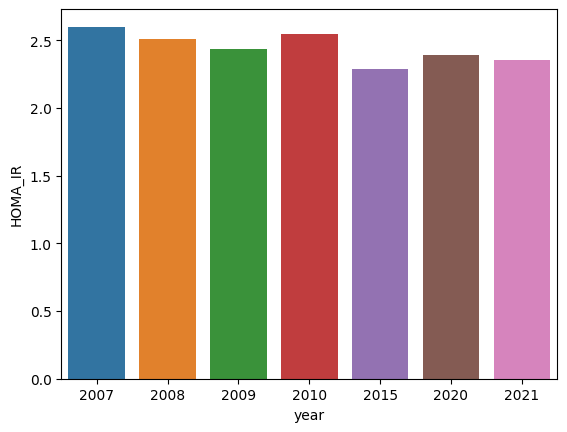

In [56]:
a = df.groupby('year')['HOMA_IR'].mean()
sns.barplot(x=a.index,y=a)

In [57]:
df.groupby('year')['HE_DM_HbA1c'].sum()

year
2007    2123
2008    9928
2009    5177
2010    7687
2015    8120
2020    9343
2021    9049
Name: HE_DM_HbA1c, dtype: int64

In [58]:
df.isnull().sum()

year             0
age              0
HE_LDL_st2       0
HE_HDL_st2       0
HE_insulin       0
HE_glu           0
HE_BMI           0
HE_wt            0
HE_wc            0
HE_chol          0
HE_TG            0
LDL_HDL_ratio    0
HOMA_IR          0
HE_DM_HbA1c      0
dtype: int64

In [59]:
df.groupby('year').mean()

,age,HE_LDL_st2,HE_HDL_st2,HE_insulin,HE_glu,HE_BMI,HE_wt,HE_wc,HE_chol,HE_TG,LDL_HDL_ratio,HOMA_IR,HE_DM_HbA1c
year,,,,,,,,,,,,,
2007,49.937231,125.533851,40.485103,10.665538,94.634462,23.500048,56.762462,80.471569,189.457231,117.191385,3.228853,2.600782,1.306462
2008,43.729280,110.692145,48.633315,10.300088,96.971425,23.114166,60.396938,79.750813,182.819204,117.468716,2.384402,2.511855,1.344529
2009,49.073894,115.314104,49.725477,9.852626,96.250831,23.439546,57.272718,78.621938,187.203784,110.821018,2.427720,2.434016,1.323702
2010,49.244141,114.765903,48.598585,10.407069,97.131747,23.575114,62.377273,80.824556,187.932528,122.840199,2.474410,2.546924,1.364879
2015,51.937035,113.181189,51.087207,8.495132,101.595051,23.938313,63.381291,82.772561,189.291289,125.114464,2.346911,2.287730,1.633474
2020,52.407539,112.693674,51.684829,9.202463,101.711140,24.175406,65.027617,84.648442,188.668408,121.449524,2.293565,2.392252,1.743422
2021,53.559577,112.949755,52.614166,8.936607,102.500489,24.075719,64.553903,84.044023,188.792409,116.142438,2.262150,2.353048,1.770495


In [21]:
## HDL, glu, BMI, wt, wc 모두 늘어나고 있음 LDL은 줄어들고 있는 모습

<AxesSubplot: title={'center': 'LDL Cholesterol'}, xlabel='year', ylabel='HE_LDL_st2'>

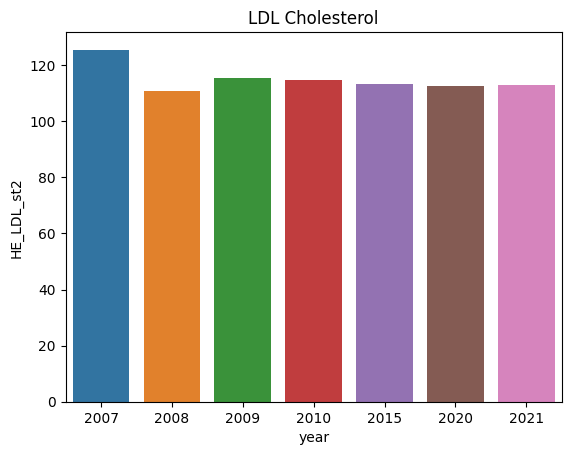

In [60]:
# 연도별 건강검진 특성 평균
df_mean = df.groupby('year').mean()
plt.title('LDL Cholesterol')
sns.barplot(x = df_mean.index, y = df_mean.HE_LDL_st2)

<AxesSubplot: title={'center': 'HDL Cholesterol'}, xlabel='year', ylabel='HE_HDL_st2'>

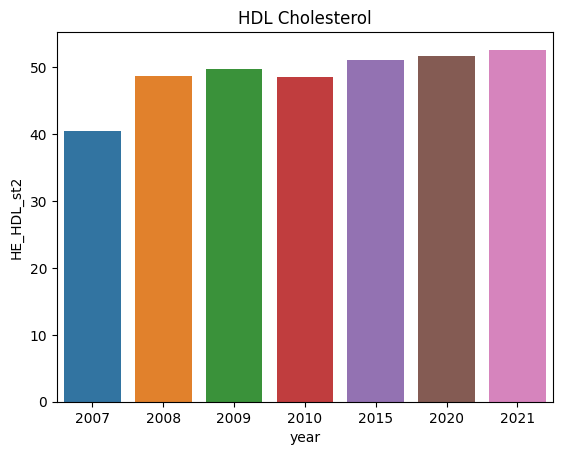

In [61]:
plt.title('HDL Cholesterol')
sns.barplot(x = df_mean.index, y = df_mean.HE_HDL_st2)

<AxesSubplot: title={'center': 'BMI'}, xlabel='year', ylabel='HE_BMI'>

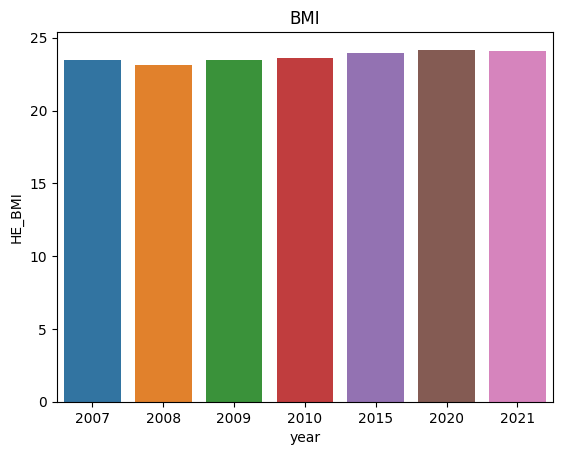

In [62]:
plt.title('BMI')
sns.barplot(x = df_mean.index, y = df_mean.HE_BMI)

In [100]:
df.drop(columns=['year'],inplace=True)
display(df)

,age,HE_LDL_st2,HE_HDL_st2,HE_insulin,HE_glu,HE_BMI,HE_wt,HE_wc,HE_chol,HE_TG,LDL_HDL_ratio,HOMA_IR,HE_DM_HbA1c
0,50,131.532,58.268,4.9,83,20.852773,51.4,75.8,203,66,2.257363,1.004198,1
1,21,108.412,45.188,10.6,84,19.265440,50.0,58.0,175,107,2.399133,2.198519,1
2,35,122.764,31.236,11.9,97,27.253123,73.3,89.3,184,150,3.930209,2.850123,1
3,76,72.564,31.236,10.3,85,23.773032,56.6,83.0,128,121,2.323089,2.161728,1
4,80,160.548,33.852,14.1,90,26.748114,57.8,89.7,229,173,4.742644,3.133333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33988,44,115.400,35.000,9.0,99,24.000000,60.0,76.0,184,168,3.297143,2.200000,1
33989,54,150.200,33.000,5.0,86,23.000000,55.0,81.0,199,79,4.551515,1.061728,2
33990,25,141.400,63.000,6.0,81,28.000000,87.0,91.0,214,48,2.244444,1.200000,1
33991,45,132.200,37.000,21.0,115,34.000000,105.0,111.0,229,299,3.572973,5.962963,2


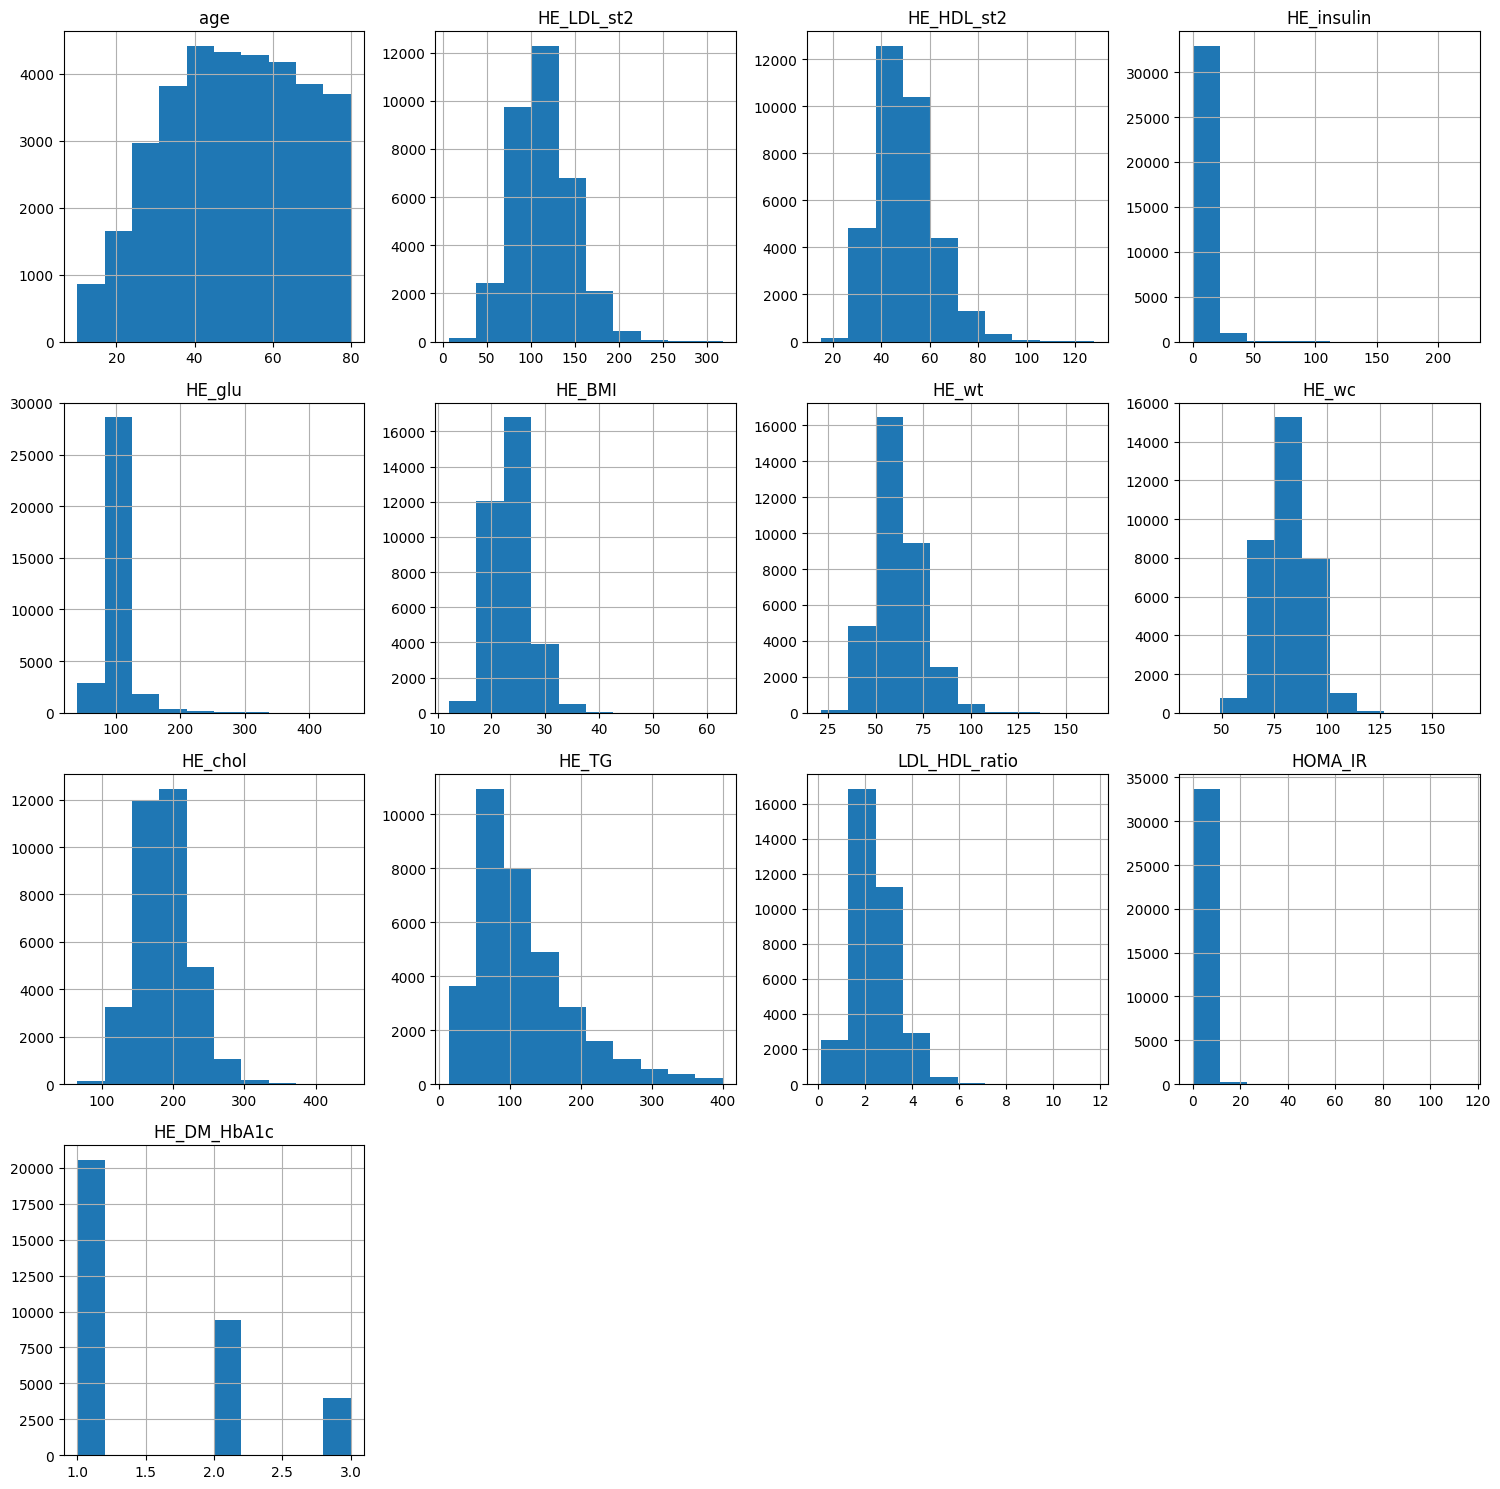

In [64]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [101]:
# 인슐린이 0인 경우는 비현실적인 값(이상치)인 경우이므로 삭제
display(df[df.HE_insulin == 0])
df=df[~df.index.isin(df[df.HE_insulin == 0].index)].reset_index(drop=True)

,age,HE_LDL_st2,HE_HDL_st2,HE_insulin,HE_glu,HE_BMI,HE_wt,HE_wc,HE_chol,HE_TG,LDL_HDL_ratio,HOMA_IR,HE_DM_HbA1c
23662,78,53.4,50.0,0.0,50,24.0,55.0,87.0,124,103,1.068,0.0,3


<AxesSubplot: >

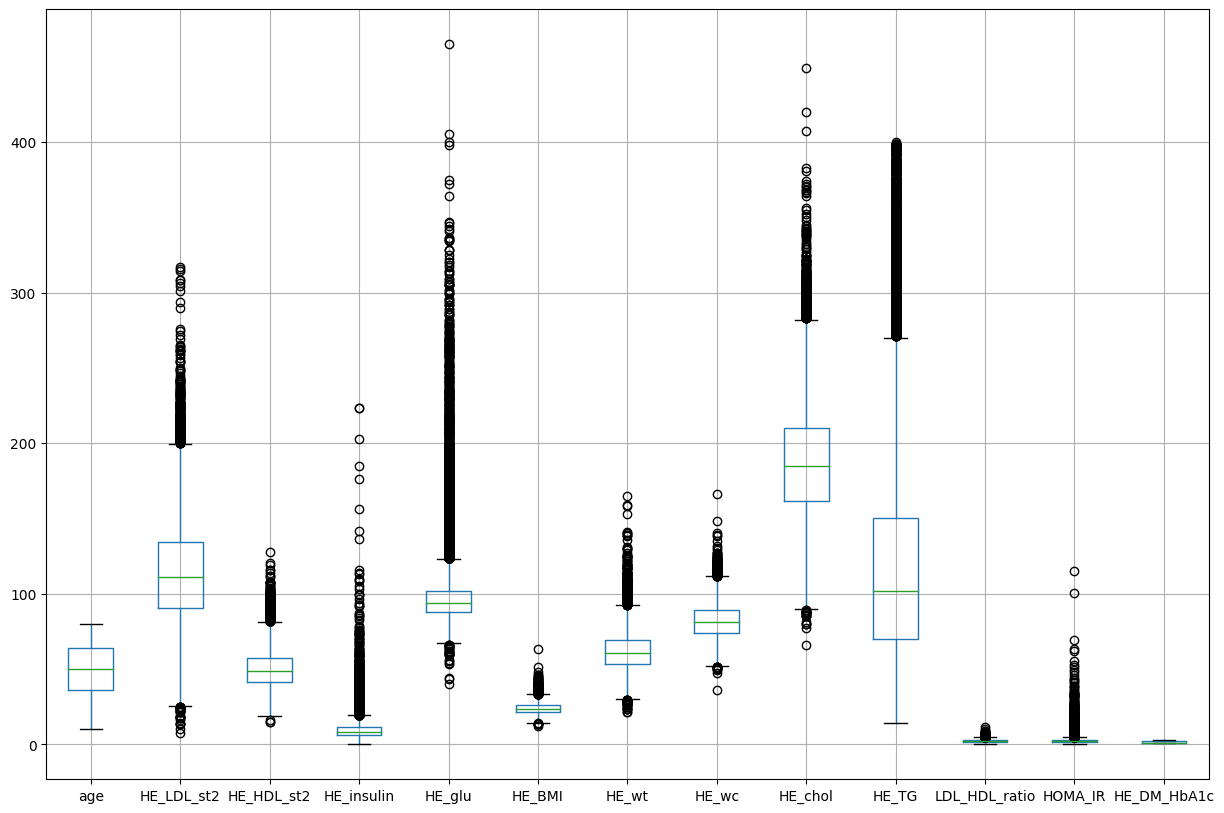

In [80]:
plt.figure(figsize=(15,10))
df.boxplot()

- HE_insulin, HE_glu, HOMA_IR log 이상치 많음 -> 로그변환

In [102]:
df['HE_insulin'] = np.log(df['HE_insulin'])
df['HE_glu'] = np.log(df['HE_glu'])
df['HOMA_IR'] = np.log(df['HOMA_IR'])

<AxesSubplot: >

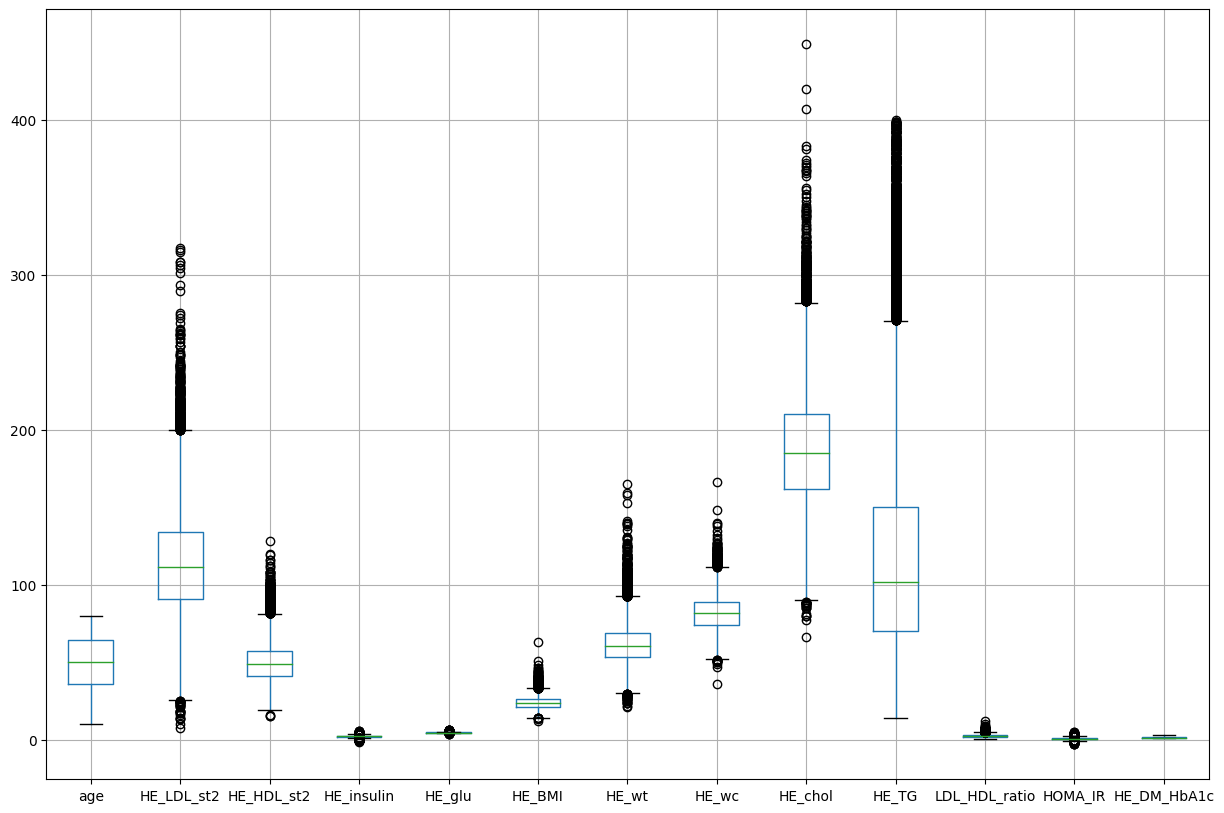

In [103]:
plt.figure(figsize=(15,10))
df.boxplot()

In [107]:
df['HE_DM_HbA1c'].value_counts()

1    20555
2     9442
3     3995
Name: HE_DM_HbA1c, dtype: int64

In [104]:
df.to_csv('eda_complete.csv',index=False)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [109]:
x = df.drop(columns=['HE_DM_HbA1c'])
y = df['HE_DM_HbA1c']

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x,y, stratify=y,)